In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/Users/muhammadzuamaalamin/Documents/labbelajar2new/project/sentimen/tweet.csv')
data

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [3]:
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [4]:
import re
import pandas as pd
import numpy as np
import random
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocessing(text):
    # case folding
    text = text.lower()

    # remove punctuation and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus link menggunakan regex
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
    # Menghapus hashtag menggunakan regex
    text = re.sub(r'#\S+', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # stopword removal
    factory = StopWordRemoverFactory()
    stopwords = factory.get_stop_words()
    words = text.split()
    text = " ".join([word for word in words if word not in stopwords])

    return text

In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
import pandas as pd

# Contoh data
# data = pd.read_csv('tweet.csv')  # kalau sudah ada data csv

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Integrasi tqdm dengan pandas apply
tqdm.pandas(desc="Stemming progress")

# Terapkan stemming dengan progress bar, pastikan input string
data["tweet"] = data["tweet"].astype(str).progress_apply(lambda x: stemmer.stem(x))

print(data)


Stemming progress: 100%|██████████| 1815/1815 [05:32<00:00,  5.46it/s]

     sentimen                                              tweet
0     negatif  kata prabowo indonesia tidak harga bangsa asin...
1      netral  batu langka tasbih jokowi hadiah dari habib lu...
2      netral  di era jokowi ekonomi indonesia makin baik 01i...
3     positif  bagi sumatera selatan asi games dampak pd ekon...
4     negatif  negara kita ngutang buat bngun infrastruktur y...
...       ...                                                ...
1810   netral  negarawan sejati sll bangga dan depan harga di...
1811   netral  1 hrs ceramah di damai indonesia 2 ekonomi mak...
1812   netral  mari bangun bangsa dgn dukung ekonomi negara s...
1813   netral  bantu maju ekonomi bangsa sama pak jokowi yuk ...
1814   netral  pak jokowi ubah cara pandang ekonomi kini semu...

[1815 rows x 2 columns]


In [6]:
data["tweet"] = data["tweet"].apply(preprocessing)
data

,sentimen,tweet
0,negatif,kata prabowo indonesia harga bangsa asing beri...
1,netral,batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,era jokowi ekonomi indonesia makin baik indone...
3,positif,sumatera selatan asi games dampak pd ekonomi l...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,netral,negarawan sejati sll bangga depan harga diri b...
1811,netral,hrs ceramah damai indonesia ekonomi makin baik...
1812,netral,bangun bangsa dgn dukung ekonomi negara sama p...
1813,netral,bantu maju ekonomi bangsa sama pak jokowi yuk ...


In [7]:
data

,sentimen,tweet
0,negatif,kata prabowo indonesia harga bangsa asing beri...
1,netral,batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,era jokowi ekonomi indonesia makin baik indone...
3,positif,sumatera selatan asi games dampak pd ekonomi l...
4,negatif,negara ngutang buat bngun infrastruktur udah d...
...,...,...
1810,netral,negarawan sejati sll bangga depan harga diri b...
1811,netral,hrs ceramah damai indonesia ekonomi makin baik...
1812,netral,bangun bangsa dgn dukung ekonomi negara sama p...
1813,netral,bantu maju ekonomi bangsa sama pak jokowi yuk ...


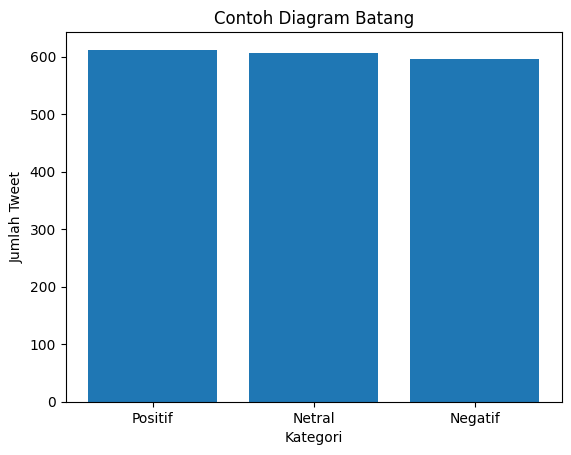

In [8]:
import matplotlib.pyplot as plt

# Data untuk diagram batang
categories = ['Positif', 'Netral', 'Negatif']

# Menghitung jumlah tweet untuk setiap kategori
positif_count = len(data[data['sentimen'] == 'positif'])
netral_count = len(data[data['sentimen'] == 'netral'])
negatif_count = len(data[data['sentimen'] == 'negatif'])

# Nilai untuk setiap kategori
values = [positif_count, netral_count, negatif_count]

# Membuat diagram batang
plt.bar(categories, values)

# Menambahkan judul dan label
plt.title('Contoh Diagram Batang')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tweet')

# Menampilkan diagram
plt.show()

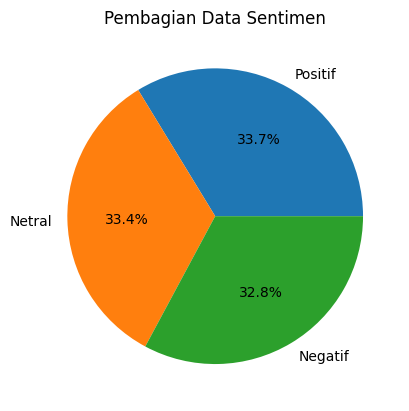

In [9]:
# Membuat diagram pie
plt.pie(values, labels=categories, autopct='%1.1f%%')

# Menambahkan judul
plt.title('Pembagian Data Sentimen')

# Menampilkan diagram
plt.show()

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
# Split parameters
vocab_size = 6000
max_length = 30
trunc_type = 'post'
oov_tok = "<OOV>"

In [12]:
# Tampilkan data dan label
texts = data["tweet"].tolist()
labels = pd.get_dummies(data['sentimen']).values  # Convert labels to categorical

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [14]:
# Menampilkan kamus (word index)
tokenizer.word_index


{'<OOV>': 1,
 'ekonomi': 2,
 'jokowi': 3,
 'prabowo': 4,
 'yg': 5,
 'gaji': 6,
 'pak': 7,
 'harga': 8,
 'com': 9,
 'presiden': 10,
 'indonesia': 11,
 'salah': 12,
 'twitter': 13,
 'jadi': 14,
 'sandi': 15,
 'ambil': 16,
 'rakyat': 17,
 'mau': 18,
 'pilih': 19,
 'negara': 20,
 'gak': 21,
 'pic': 22,
 'bukan': 23,
 'kerja': 24,
 'ga': 25,
 'aja': 26,
 'debat': 27,
 'apa': 28,
 'tak': 29,
 'sama': 30,
 'sandiuno': 31,
 'prabowosandi': 32,
 'kata': 33,
 'baik': 34,
 'bangun': 35,
 'buat': 36,
 'tumbuh': 37,
 'http': 38,
 'pimpin': 39,
 'kalau': 40,
 'lebih': 41,
 'orang': 42,
 'makro': 43,
 'nya': 44,
 'utm': 45,
 'janji': 46,
 'tdk': 47,
 'status': 48,
 'perintah': 49,
 'kalo': 50,
 'soal': 51,
 'pajak': 52,
 'www': 53,
 'prabowosalahkansby': 54,
 'naik': 55,
 'semua': 56,
 'utk': 57,
 'arah': 58,
 'tp': 59,
 'banyak': 60,
 'tahun': 61,
 'game': 62,
 'jelas': 63,
 'tingkat': 64,
 'bilang': 65,
 'kan': 66,
 'bit': 67,
 'ly': 68,
 'satu': 69,
 'anak': 70,
 'nyata': 71,
 'id': 72,
 'bapak': 

In [15]:
# Menampilkan data teks dan labels
print("Data Teks:")
print(texts[9])  # Menampilkan 5 teks pertama

print("\nLabels:")
print(labels[9])  # Menampilkan 5 label pertama

Data Teks:
prabowosandi sepakat tak ambil gaji negara sedang susah www goaceh co artikel serbaserbi prabowosandisepakattakambilgajikarenanegarasedangsusah utm source dlvr it utm medium twitter goaceh

Labels:
[ True False False]


In [16]:
# Menampilkan padded sequences
print(padded_sequences[:5])  # Menampilkan 5 contoh pertama


[[   0    0    0    0    0    0    0    0    0    0    0    0    0   33
     4   11    8   76  608  182  334   36  276   66 1788   13    9 1164
    48  393]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 1424 1425 1789    3 1165 2586 2587    8 2588   38  204
   160 2589]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  143    3    2   11  168   34  565 1166  110   22   13
     9 2590]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  811 2591  609  335  298  193    2  174 1167  152  812   11  104
     3  285]
 [   0    0    0    0    0   20  909   36 2592  117  113 1168  139  105
   139 1790   20  909  299   20  909  466   98   50   20  610   75   75
    20   52]]


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Misalkan 'texts' adalah daftar teks yang sudah ada
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)

# Menghitung jumlah kata unik
jumlah_kata = len(tokenizer.word_index)
print("Jumlah kata unik:", jumlah_kata)


Jumlah kata unik: 5970


In [18]:
# Tokenizer & Padding
vocab_size = 6000         # Disesuaikan agar mencakup semua kata unik + <OOV>
max_length = 30           # Masih cocok untuk tweet
trunc_type = 'post'
oov_tok = "<OOV>"

# Hyperparameters
embedding_dim = 64        # Sudah cukup representatif untuk tweet pendek
gru1_dim = 64             # Menangkap konteks urutan
gru2_dim = 32             # Layer GRU tambahan (lebih kecil = mencegah overfitting)
dense_dim = 64            # Fully connected sebelum output

In [ ]:
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# # Define a function to create the model
# def create_model(embedding_dim=64, gru1_dim=64, gru2_dim=32, dense_dim=64, dropout_rate=0.2):
#     model = Sequential([
#         Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
#         GRU(gru1_dim, return_sequences=True),
#         GRU(gru2_dim),
#         Dense(dense_dim, activation='relu'),
#         Dropout(dropout_rate),
#         Dense(3, activation='softmax')  # Output layer for multi-class classification
#     ])
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Wrap the model using KerasClassifier from scikeras
# model = KerasClassifier(model=create_model, verbose=0)

# # Define the hyperparameter grid
# param_grid = {
#     'model__embedding_dim': [32, 64],
#     'model__gru1_dim': [32, 64],
#     'model__gru2_dim': [16, 32],
#     'model__dense_dim': [32, 64],
#     'model__dropout_rate': [0.2, 0.3],
#     'batch_size': [32, 64],
#     'epochs': [10, 20]
# }

# # Perform GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best parameters found: ", grid_result.best_params_)
# print("Best accuracy achieved: ", grid_result.best_score_)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a function to create the model
def create_model(embedding_dim, gru1_dim, gru2_dim, dense_dim, dropout_rate):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        GRU(gru1_dim, return_sequences=True),
        GRU(gru2_dim),
        Dense(dense_dim, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')  # Output layer for multi-class classification
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Define hyperparameter grid
hyperparameter_grid = [
    {'embedding_dim': 32, 'gru1_dim': 64, 'gru2_dim': 32, 'dense_dim': 64, 'dropout_rate': 0.2},
    {'embedding_dim': 64, 'gru1_dim': 128, 'gru2_dim': 64, 'dense_dim': 128, 'dropout_rate': 0.3},
    {'embedding_dim': 128, 'gru1_dim': 256, 'gru2_dim': 128, 'dense_dim': 256, 'dropout_rate': 0.4},
]

# Iterate through the grid and train models
results = []
for params in hyperparameter_grid:
    print(f"Training with parameters: {params}")
    model = create_model(**params)
    history = model.fit(
        X_train, y_train,
        epochs=10,
        validation_data=(X_val, y_val),
        verbose=1
    )
    results.append({
        'params': params,
        'history': history.history
    })

# Print results
for result in results:
    print(f"Parameters: {result['params']}")
    print(f"Final Training Accuracy: {result['history']['accuracy'][-1]}")
    print(f"Final Validation Accuracy: {result['history']['val_accuracy'][-1]}")

Training with parameters: {'embedding_dim': 32, 'gru1_dim': 64, 'gru2_dim': 32, 'dense_dim': 64, 'dropout_rate': 0.2}
Epoch 1/10
46/46 [==============================] - 2s 20ms/step - loss: 1.0954 - accuracy: 0.3629 - val_loss: 1.0735 - val_accuracy: 0.4628
Epoch 2/10
46/46 [==============================] - 1s 13ms/step - loss: 0.9626 - accuracy: 0.5062 - val_loss: 0.9718 - val_accuracy: 0.5262
Epoch 3/10
46/46 [==============================] - 1s 14ms/step - loss: 0.7273 - accuracy: 0.6715 - val_loss: 1.0266 - val_accuracy: 0.5372
Epoch 4/10
46/46 [==============================] - 1s 13ms/step - loss: 0.4830 - accuracy: 0.8003 - val_loss: 1.2568 - val_accuracy: 0.5399
Epoch 5/10
46/46 [==============================] - 1s 13ms/step - loss: 0.2521 - accuracy: 0.9187 - val_loss: 1.4778 - val_accuracy: 0.5317
Epoch 6/10
46/46 [==============================] - 1s 13ms/step - loss: 0.1296 - accuracy: 0.9601 - val_loss: 1.7691 - val_accuracy: 0.5427
Epoch 7/10
46/46 [==================

Epoch 1/10
46/46 [==============================] - 3s 33ms/step - loss: 1.0802 - accuracy: 0.4015 - val_loss: 0.9943 - val_accuracy: 0.4904
Epoch 2/10
46/46 [==============================] - 1s 28ms/step - loss: 0.8472 - accuracy: 0.6143 - val_loss: 0.9359 - val_accuracy: 0.5840
Epoch 3/10
46/46 [==============================] - 1s 28ms/step - loss: 0.4826 - accuracy: 0.8196 - val_loss: 1.1719 - val_accuracy: 0.5840
Epoch 4/10
46/46 [==============================] - 1s 30ms/step - loss: 0.2202 - accuracy: 0.9167 - val_loss: 1.3407 - val_accuracy: 0.5510
Epoch 5/10
46/46 [==============================] - 1s 30ms/step - loss: 0.1196 - accuracy: 0.9601 - val_loss: 1.6839 - val_accuracy: 0.5455
Epoch 6/10
46/46 [==============================] - 1s 29ms/step - loss: 0.0868 - accuracy: 0.9697 - val_loss: 1.9400 - val_accuracy: 0.5427
Epoch 7/10
46/46 [==============================] - 1s 31ms/step - loss: 0.0772 - accuracy: 0.9738 - val_loss: 1.9940 - val_accuracy: 0.5482
Epoch 8/10
46

Epoch 1/10
46/46 [==============================] - 5s 68ms/step - loss: 1.0639 - accuracy: 0.4187 - val_loss: 0.9953 - val_accuracy: 0.5014
Epoch 2/10
46/46 [==============================] - 3s 67ms/step - loss: 0.7819 - accuracy: 0.6687 - val_loss: 0.9830 - val_accuracy: 0.5675
Epoch 3/10
46/46 [==============================] - 3s 70ms/step - loss: 0.4325 - accuracy: 0.8361 - val_loss: 1.0667 - val_accuracy: 0.5730
Epoch 4/10
46/46 [==============================] - 3s 70ms/step - loss: 0.2173 - accuracy: 0.9284 - val_loss: 1.4898 - val_accuracy: 0.5565
Epoch 5/10
46/46 [==============================] - 3s 73ms/step - loss: 0.1164 - accuracy: 0.9607 - val_loss: 1.7211 - val_accuracy: 0.5399
Epoch 6/10
46/46 [==============================] - 3s 74ms/step - loss: 0.0947 - accuracy: 0.9704 - val_loss: 1.7476 - val_accuracy: 0.5344
Epoch 7/10
46/46 [==============================] - 3s 74ms/step - loss: 0.0656 - accuracy: 0.9814 - val_loss: 1.8948 - val_accuracy: 0.5427
Epoch 8/10
46

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
    # Define the model architecture using the hyperparameters
model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
        GRU(256, return_sequences=True),
        GRU(128),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(3, activation='softmax')  # Output layer for multi-class classification
    ])

    # Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

    # Display the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 128)           768000    
                                                                 
 gru_16 (GRU)                (None, 30, 256)           296448    
                                                                 
 gru_17 (GRU)                (None, 128)               148224    
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1246467 (4.75 MB)
Trainable params: 1246

In [45]:
from tensorflow.keras.callbacks import Callback

# YOUR CODE STARTS HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') and logs.get('val_accuracy') > 0.56):
      print('\nReached 56.8% accuracy so cancelling training!')
      self.model.stop_training = True
    
# YOUR CODE ENDS HERE
callbacks=myCallback()



# Use the callback during training
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/10
46/46 [==============================] - 5s 71ms/step - loss: 1.0495 - accuracy: 0.4318 - val_loss: 1.0023 - val_accuracy: 0.5262
Epoch 2/10
45/46 [============================>.] - ETA: 0s - loss: 0.7512 - accuracy: 0.6743
Reached 56.8% accuracy so cancelling training!
46/46 [==============================] - 3s 69ms/step - loss: 0.7547 - accuracy: 0.6722 - val_loss: 1.0621 - val_accuracy: 0.5675


In [46]:
# Evaluasi model
loss, accuracy = model.evaluate(X_val, y_val)

# Menampilkan hasil evaluasi
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

12/12 [==============================] - 0s 20ms/step - loss: 1.0621 - accuracy: 0.5675
Loss: 1.0621334314346313
Accuracy: 0.5674931406974792


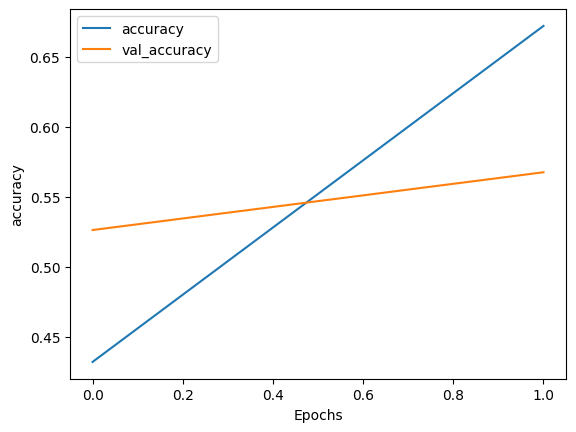

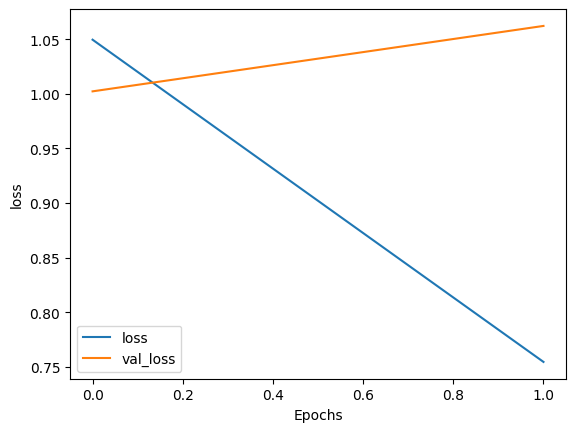

In [47]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Jika X_test dan y_test belum didefinisikan, kita dapat membagi data validasi
X_test, y_test = X_val, y_val  # Menggunakan data validasi sebagai data uji

# Melakukan prediksi
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Mengambil kelas dengan probabilitas tertinggi
y_test_classes = y_test.argmax(axis=1)  # Mengambil kelas sebenarnya

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

12/12 [==============================] - 1s 22ms/step
Confusion Matrix:
[[87 18 10]
 [25 80 13]
 [37 54 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       115
           1       0.53      0.68      0.59       118
           2       0.63      0.30      0.41       130

    accuracy                           0.57       363
   macro avg       0.58      0.58      0.55       363
weighted avg       0.58      0.57      0.55       363



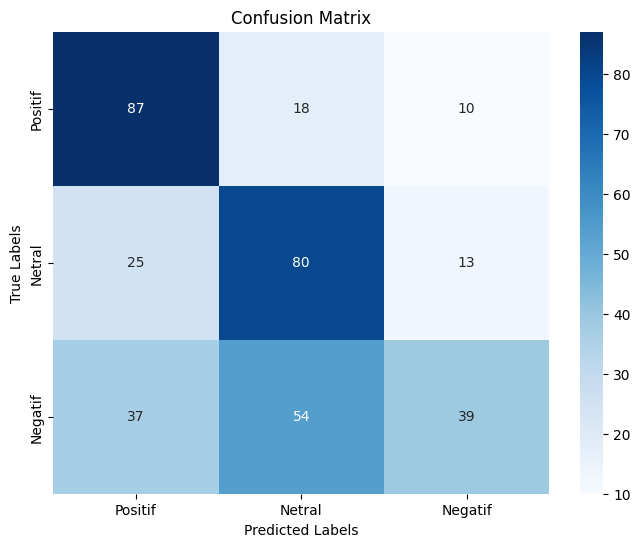

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [50]:
# Save the model to a file
model.save('sentiment_analysis_gru_model.h5')

print("Model saved successfully!")

Model saved successfully!


/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
from tensorflow.keras.models import load_model

# Load the model from the file
loaded_model = load_model('sentiment_analysis_gru_model.h5')

# Display the model summary to verify it was loaded correctly
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 128)           768000    
                                                                 
 gru_16 (GRU)                (None, 30, 256)           296448    
                                                                 
 gru_17 (GRU)                (None, 128)               148224    
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1246467 (4.75 MB)
Trainable params: 1246

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Menampilkan hasil
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.5674931129476584
Precision: 0.5813418945261523
Recall: 0.5674931129476584
F1-Score: 0.5469252905547671


In [55]:
# Fungsi untuk melakukan prediksi pada input teks baru
def predict_sentiment(input_text):
    # Preprocessing teks input
    processed_text = preprocessing(input_text)
    
    # Konversi teks menjadi sequence menggunakan tokenizer
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, truncating=trunc_type)
    
    # Melakukan prediksi menggunakan model yang telah dilatih
    prediction = model.predict(padded_sequence)
    predicted_class = prediction.argmax(axis=1)[0]
    
    # Mengembalikan hasil prediksi
    return categories[predicted_class]

# Contoh penggunaan
input_text = "lanjut periode pak or yg gk suka dgn pmbngunan infrastruktur gak paham variabel tumbuh ekonomi"
predicted_sentiment = predict_sentiment(input_text)
print(f"Prediksi sentimen: {predicted_sentiment}")

1/1 [==============================] - 0s 17ms/step
Prediksi sentimen: Positif


In [54]:
import pickle

# Save the tokenizer to a file
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

print("Tokenizer exported successfully!")

Tokenizer exported successfully!
